# Pymaceuticals Inc.
---

### Analysis

- The correlation between the weight of the mouse and tumor volume treated with Capomulin is high. It seems that the larger the mouse, the bigger the tumors tend to be. 

- Capomulin has shown it's effectiveness in Mouse l509 as the tumor volume decreased overtime. 

- Overall, Capomulin outperformed other treatment drugs in this drug trial. 
 

In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_merge = pd.merge(study_results, mouse_metadata, how="left")

# Display the data table for preview
mouse_study_merge.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [55]:
# Checking the number of mice.
mouse_study_merge["Mouse ID"].nunique()


249

In [56]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
find_duplicate = mouse_study_merge.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
find_duplicate_mouse = mouse_study_merge[find_duplicate]
duplicate_mouse = find_duplicate_mouse['Mouse ID'].unique()
duplicate_mouse 

array(['g989'], dtype=object)

In [57]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = mouse_study_merge[mouse_study_merge["Mouse ID"] == duplicate_mouse[0]]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [58]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_study_new = mouse_study_merge[~mouse_study_merge['Mouse ID'].isin(duplicate_mouse)]
mouse_study_new.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [59]:
# Checking the number of mice in the clean DataFrame.
mouse_study_new["Mouse ID"].nunique()

248

## Summary Statistics

In [60]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.

drug_regimen = mouse_study_new.set_index(["Drug Regimen"])
drug_regimen_group = drug_regimen.groupby("Drug Regimen")
drug_regimen_group.head()

drug_regimen_mean = drug_regimen_group["Tumor Volume (mm3)"].mean()
drug_regimen_median = drug_regimen_group["Tumor Volume (mm3)"].median()
drug_regimen_var = drug_regimen_group["Tumor Volume (mm3)"].var()
drug_regimen_SD = drug_regimen_group["Tumor Volume (mm3)"].std()
drug_regimen_SEM = drug_regimen_group["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

drug_regimen_df = pd.DataFrame({
    "Mean Tumor Volume":  drug_regimen_mean,
    "Median Tumor Volume":  drug_regimen_median,
    "Tumor Volume Variance":  drug_regimen_var,
    "Tumor Volume Std. Dev.":  drug_regimen_SD,
    "Tumor Volume Std. Err.":  drug_regimen_SEM
    })
drug_regimen_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [61]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_aggregated = drug_regimen.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
drug_regimen_aggregated

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

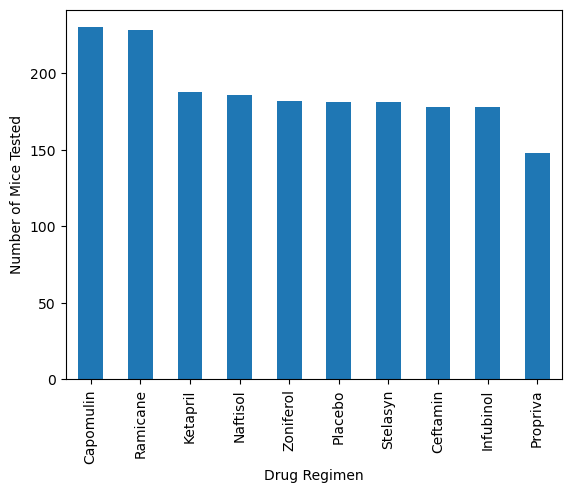

In [62]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
Mouse_bar_chart = (mouse_study_new.groupby(["Drug Regimen"])["Timepoint"].count()).sort_values(ascending = False)
Mouse_bar_chart.plot(kind="bar", xlabel = "Drug Regimen", ylabel = "Number of Mice Tested")
plt.show()

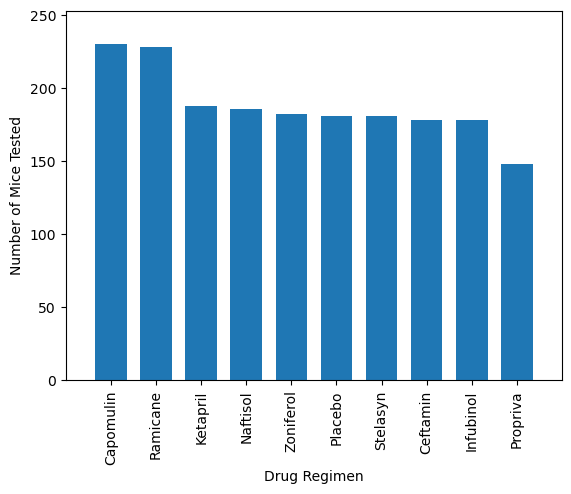

In [63]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x_axis = list(Mouse_bar_chart.index)
plt.bar(x_axis, Mouse_bar_chart, width = 0.7)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xlim(-1, len(x_axis))
plt.ylim(0, max(Mouse_bar_chart) * 1.1)
plt.xticks(label = Mouse_bar_chart.index, rotation = "vertical")
plt.show()

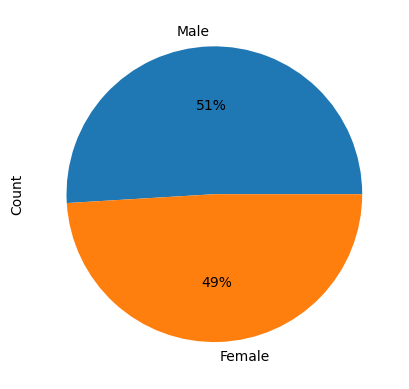

In [64]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
female_vs_male = mouse_study_new["Sex"]
female_vs_male

# Get the unique mice with their gender
gender_count = female_vs_male.value_counts()
gender_count

# Make the pie chart
gender_count.plot(kind="pie", autopct="%1.0f%%", labels=["Male", "Female"])
plt.ylabel('Count') 
plt.show()

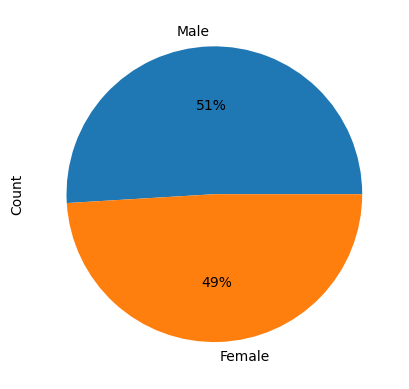

In [92]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart

plt.pie(gender_count, labels = gender_count.index, autopct = "%1.0f%%")
plt.ylabel("Count")
plt.show()


## Quartiles, Outliers and Boxplots

In [66]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timpoint = mouse_study_new.groupby(mouse_study_new["Mouse ID"])["Timepoint"].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_volume_greatest = pd.merge(greatest_timpoint, mouse_study_new, on = ["Mouse ID", "Timepoint"])
tumor_volume_greatest

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [67]:
# Put treatments into a list for for loop (and later for plot labels)

drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

tumor_volume_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds

for drug in drugs:
    drug_per_tumor = tumor_volume_greatest.loc[tumor_volume_greatest["Drug Regimen"] == drug, "Tumor Volume (mm3)"]
    tumor_volume_data.append(drug_per_tumor)
    quartiles = drug_per_tumor.quantile([.25, .5, .75])
    lower_q = quartiles[.25]
    upper_q = quartiles[.75]
    iqr = upper_q - lower_q
    lower_bound = lower_q - (1.5 * iqr) 
    upper_bound = upper_q + (1.5 * iqr)
    outliers = drug_per_tumor.loc[(drug_per_tumor > upper_bound) | (drug_per_tumor < lower_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


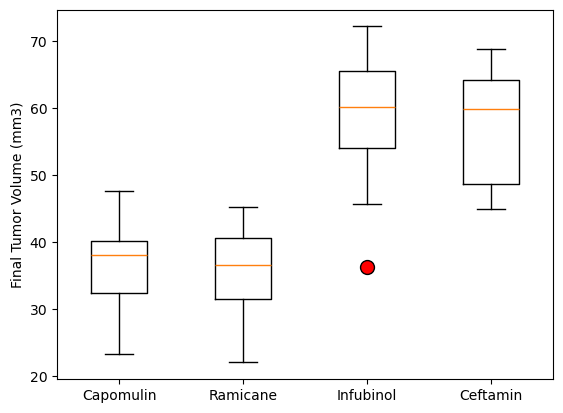

In [68]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
tumor_per_treatment = dict(markerfacecolor="red", marker='o', markersize = 10)

plt.boxplot(tumor_volume_data, labels = drugs, flierprops = tumor_per_treatment)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

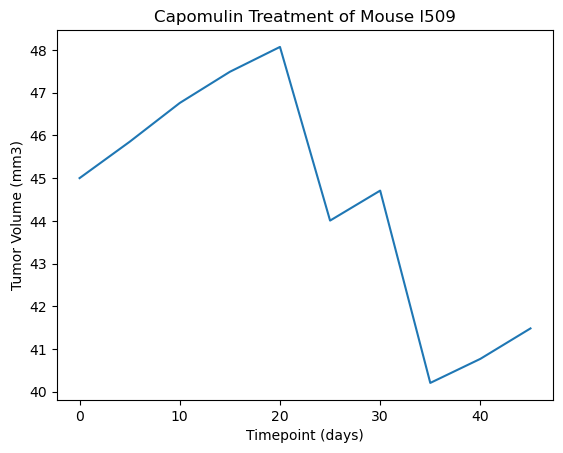

In [69]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_mouse = mouse_study_new[mouse_study_new["Mouse ID"]=="l509"]
plt.plot(Capomulin_mouse["Timepoint"],Capomulin_mouse["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title(f"Capomulin Treatment of Mouse l509")
plt.show()

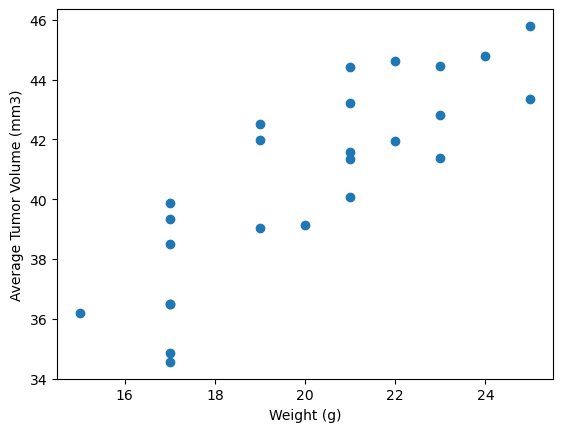

In [70]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
Capomulin_data =  mouse_study_new[mouse_study_new["Drug Regimen"] == "Capomulin"]
tumor_volume_average = Capomulin_data.groupby(["Mouse ID"])["Tumor Volume (mm3)"].mean()
mouse_weights = Capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
plt.scatter(mouse_weights, tumor_volume_average)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


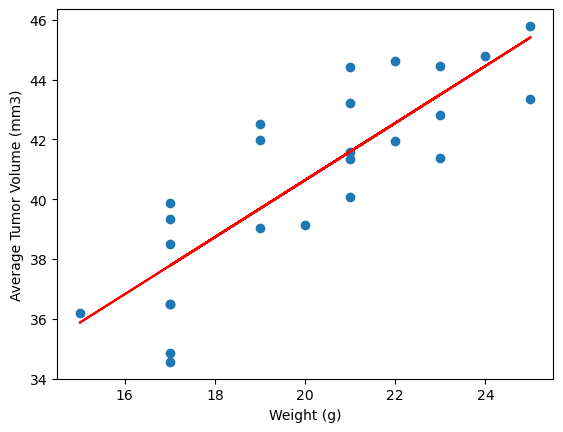

In [91]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(mouse_weights, tumor_volume_average)
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weights, tumor_volume_average)
regress_values = slope * mouse_weights + intercept

plt.scatter(mouse_weights, tumor_volume_average)
plt.plot(mouse_weights,regress_values,"r")

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
print(f"The correlation between mouse weight and the average tumor volume is{correlation[0]: .2f}")